## Installing all the required Libraries##

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn

In [ ]:
! pip install chart_studio
! pip install plotly
! pip install plotly.offline

ERROR: Could not find a version that satisfies the requirement plotly.offline (from versions: none)
ERROR: No matching distribution found for plotly.offline


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
import pandas as pd
deriv = pd.read_csv("Binary.csv")
print(deriv)

          Date   Time       Open       High        Low      Close
0   2024-06-12  07:39  590248.59  590315.72  589928.67  589930.93
1   2024-06-12  07:40  589931.66  589969.70  589794.31  589885.07
2   2024-06-12  07:41  589893.88  589912.44  589714.03  589867.45
3   2024-06-12  07:42  589911.03  589964.02  589718.58  589917.97
4   2024-06-12  07:43  589903.12  590216.77  589855.16  590216.77
..         ...    ...        ...        ...        ...        ...
95  2024-06-12  09:11  593713.90  593938.68  593674.44  593726.90
96  2024-06-12  09:11  593713.90  593938.68  593674.44  593691.08
97  2024-06-12  09:11  593713.90  593938.68  593674.44  593707.07
98  2024-06-12  09:11  593713.90  593938.68  593674.44  593733.92
99  2024-06-12  09:12  593741.26  593741.26  593741.26  593741.26

[100 rows x 6 columns]


In [ ]:
deriv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    100 non-null    object 
 1   Time    100 non-null    object 
 2   Open    100 non-null    float64
 3   High    100 non-null    float64
 4   Low     100 non-null    float64
 5   Close   100 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.8+ KB


In [ ]:
deriv['Date'] = pd.to_datetime(deriv['Date'])

In [ ]:
print(f'Dataframe contains Synthetic prices between {deriv.Date.min()} {deriv.Date.max()}')
print(f'Total days = {(deriv.Date.max()  - deriv.Date.min()).days} days')

Dataframe contains Synthetic prices between 2024-06-12 00:00:00 2024-06-12 00:00:00
Total days = 0 days


In [ ]:
deriv.describe()

,Date,Open,High,Low,Close
count,100,100.000000,100.000000,100.000000,100.000000
mean,2024-06-12 00:00:00,591742.092700,591907.641300,591623.474100,591777.937600
min,2024-06-12 00:00:00,589690.580000,589787.470000,589523.630000,589687.770000
25%,2024-06-12 00:00:00,590941.175000,591112.732500,590845.032500,590980.620000
50%,2024-06-12 00:00:00,591961.640000,592089.960000,591817.780000,591994.325000
75%,2024-06-12 00:00:00,592544.600000,592716.892500,592437.285000,592616.412500
max,2024-06-12 00:00:00,593746.100000,593938.680000,593741.260000,593749.940000
std,NaN,1180.456198,1194.165958,1196.842253,1188.288074


<Axes: >

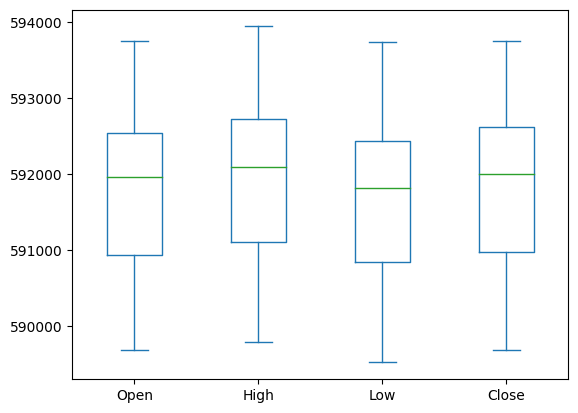

In [ ]:
print(f'Dataframe contains Synthetic prices between {deriv.Date.min()} {deriv.Date.max()}')
print(f'Total days = {(deriv.Date.max()  - deriv.Date.min()).days} days')

In [ ]:
!pip install plotly
import plotly.graph_objects as go

Layout = go.Layout(
    title='Synthetic Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )

    ),
    yaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
  )
)
deriv_data = [{'x':deriv['Date'], 'y':deriv['Close']}]
plot = go.Figure(data=deriv_data, layout=Layout)

In [ ]:
Layout = go.Layout(
    title='Synthetic Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )

    ),
    yaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
  )
)
deriv_data = [{'x':deriv['Date'], 'y':deriv['Close']}]
plot = go.Figure(data=deriv_data, layout=Layout)

In [ ]:
!pip install plotly
import plotly.graph_objects as go
from plotly.offline import iplot

Layout = go.Layout(
    title='Synthetic Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )

    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
  )
)
deriv_data = [{'x':deriv['Date'], 'y':deriv['Close']}]
plot = go.Figure(data=deriv_data, layout=Layout)

iplot(plot)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [ ]:
import numpy as np
x = np.array(deriv.index).reshape(-1,1)
y = deriv['Close']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)